In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.applications import ResNet50
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
from google.colab import drive
drive.mount('/content/drive')

np.random.seed(1000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tflearn.datasets.oxflower17 as oxflower17
_x, _y = oxflower17.load_data(one_hot=True)


Instructions for updating:
Colocations handled automatically by placer.


100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!


In [0]:
def load_images(folder_name_true, folder_name_false):
  counter = 0
  counter1 = 0
  a = []
  for filename in os.listdir(folder_name_true):
    img = cv2.imread(os.path.join(folder_name_true, filename))
    try:
      res = cv2.resize(img, dsize = (250,250))
    except:
      pass
    if img is not None:
      counter += 1
      print(counter)
      a.append(res)

  for filename in os.listdir(folder_name_false):
    img = cv2.imread(os.path.join(folder_name_false, filename))
    try:
      res = cv2.resize(img, dsize = (250,250))
    except:
      pass
    if img is not None:
      counter1 += 1
      print(counter1)
      a.append(res)
  return a, counter, counter1

In [0]:
imgs, no_true, no_false = load_images('/content/drive/My Drive/Cropped_Pot_Images/', '/content/drive/My Drive/Random Images/')
_x = np.array(imgs)
print(_x.shape)
_y_true = np.ones([no_true, 1])
_y_false = np.zeros([no_false, 1])
#_y = np.concatenate(_y_true, _y_false, axis=0)

print(_y_true.shape)
print(_y_false.shape)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176


In [0]:
_y = np.concatenate((_y_true, _y_false), axis=0)
print(_y.shape)

X_train, x_test, Y_train, y_test = train_test_split(_x, _y, test_size = 0.1)

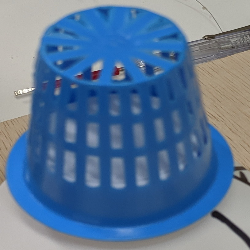

In [0]:
cv2_imshow(x_test[30])

In [0]:
# (3) Create a sequential model
model = Sequential()


# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(250,250,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
'''
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
'''
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(1))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])

# (5) Train
model.fit(X_train, Y_train, batch_size=10, epochs=50, verbose=1, \
validation_split=0, shuffle=True)


In [0]:
pred = model.predict(x_test)
cv2_imshow(x_test[0])
print(pred)

cv2_imshow(x_test[30])
print(pred[30])



In [0]:
dprint(model.metrics_names)
score = model.evaluate(x_test, y_test)
print(score)


In [0]:
model.save_weights('mymodel.h5')

In [0]:
# (3) Create a sequential model
model = Sequential()

model.add(ResNet50(include_shape = (250,250,3), pooling = 'avg', weights = 'mymodel.h5'))

model.add(Dense(17, activation = 'softmax'))

model.layers[0].trainable = False

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])

# (5) Train
model.fit(_x, _y, batch_size=128, epochs=1000000, verbose=1, \
validation_split=0.2, shuffle=True)

TypeError: ignored

In [0]:
print(model.metrics_names)
score = model.evaluate(x_test, y_test)
print(score)